# Report from the Mini-Project: A Simple Search Engine from Scratch
  Group Members: 
  - Miguel Candeias nº50647 -MiEI
  - Salvador Mendes nº50503 -MiEI
  
Course: Information Retrieval 19/20

Teacher: João Magalhães FCT-UNL
  
# 1. Parameter tuning for LMD and LMJM
  - LMD : 
    
    $$p(t|M_d, M_c)= \frac{f_{t,d}+\mu \cdot M_c(t)}{|d| + \mu}$$
    
    -For this model we opted by using a $$\mu$$ of 0.5 with $$\mu \in [0, 1]$$

  - LMJM: 
   
    $$p(q|d,C)= \lambda \cdot p(q|M_d) + (1-\lambda)\cdot p(q|M_c)$$
   
    -As for this model we used a $$\lambda$$ value of 0.75 in the same range of the LMD parameter

    -Low value of λ tends to be more disjunctive, suitable for long queries

    -High value of λ tends to retrieve documents containing all query words. 

    -This values are optimal values for the algorithm, that's mainly the reason we tested the project with them,
but any value from the range [0, 1] is valid.

Since we didn't do the RM3 model, as said above, we decided to implement the optional BM25 model as we were curious about the results.
- BM25: 
   
   $$RSV = \sum q_t \cdot \frac{f_{t,d}(k_1 + 1)}{k_1 ((1-b) + b(\frac{l_d}{l_avg})) + f_{t,d} }\cdot IDF_t$$
   
   The  $$k_1$$ parameter has a value of 1.75 and $$b$$ parameter of 0.75, this values are the optimal/typical values for the algorithm, with $$k_1 \in[1.2, 2]$$
   and $$b \in[0,1] $$

# 2. Parameter tuning for RM3 
    
 As for the RM3 model, we did not implement it duo to reasons of time management and mainly because
 we counl'd not reach more than a paper scratch for the algorithm, that did't work.
 For this model we hope to implement the algorithm for personal motivation and analize the results in a near future.
    
# 3. Comparison of different models in terms of MAP, P10 and precision-recall curves.


In [1]:
from sklearn.feature_extraction.text import CountVectorizer

import ReportAux as aux
import collectionloaders

cl = collectionloaders.CranfieldTestBed()
verbose = True
vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b',
                             min_df=1, stop_words='english')

[map_vsm, p10_vsm] = aux.vsm(vectorizer, cl, verbose)
[map_lmd, p10_lmd] = aux.lmd(vectorizer, cl, verbose, mu = 0.5)
[map_lmjm, p10_lmjm] = aux.lmjm(vectorizer, cl, verbose, lmbd = 0.75)
[map_bm25, p10_bm25] = aux.bm25(vectorizer, cl, verbose, k1 = 1.75, b = 0.75)
print("MAP VSM Score : " + str(map_vsm))
print("MAP LMD Score : " + str(map_lmd))
print("MAP LMJM Score : " + str(map_lmjm))
print("P@10 VSM Score : " + str(p10_vsm))
print("P@10 LMD Score : " + str(p10_lmd))
print("P@10 LMJM Score : " + str(p10_lmjm))
print("MAP BM25 Score : " +str(map_bm25))
print("P@10 BM25 Score : " +str(p10_bm25))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\USER\Desktop\Information Retrieval 2019 - MiniProject - evaluation\RetrievalModelsMatrix.py:56: RuntimeWarning: invalid value encountered in true_divide
  pmd = np.divide(ftd, self.docLenVert)


Number of documents:  1400
Number of queries:  225
qid = 1 VSM     AP= 0.2411762882032259
qid = 2 VSM     AP= 0.1945733390894745
qid = 3 VSM     AP= 0.6237189440993789
qid = 4 VSM     AP= 0.5666666666666667
qid = 5 VSM     AP= 0.2893654524089307
qid = 6 VSM     AP= 0.18539915966386555
qid = 7 VSM     AP= 0.09598269911702748
qid = 8 VSM     AP= 0.21582380230081616
qid = 9 VSM     AP= 1.0
qid = 10 VSM     AP= 0.23300637805210977
qid = 11 VSM     AP= 0.21406173417558616
qid = 12 VSM     AP= 0.2882967607105538
qid = 13 VSM     AP= 0.002857142857142857
qid = 14 VSM     AP= 0.6111111111111112
qid = 15 VSM     AP= 0.625
qid = 16 VSM     AP= 0.2080392156862745
qid = 17 VSM     AP= 0.5077519379844961
qid = 18 VSM     AP= 0.17844710406789774
qid = 19 VSM     AP= 0.03709227088641666
qid = 20 VSM     AP= 0.698540965207632
qid = 21 VSM     AP= 0.17697811447811448
qid = 22 VSM     AP= 0.0007142857142857143
qid = 23 VSM     AP= 0.2733009473328487
qid = 24 VSM     AP= 0.33448275862068966
qid = 25 VSM 

 *The following table summarizes the MAP and P10 results*:


|  Retrieval Model | P10 | MAP |
|-----------------|-----|----------|
| VSM             |0.30|0.30|
| LMD             |0.0|0.01|
| LMJM            |0.24|0.21|
| BM25            |0.20|0.19|


  **VSM Recall curve :**

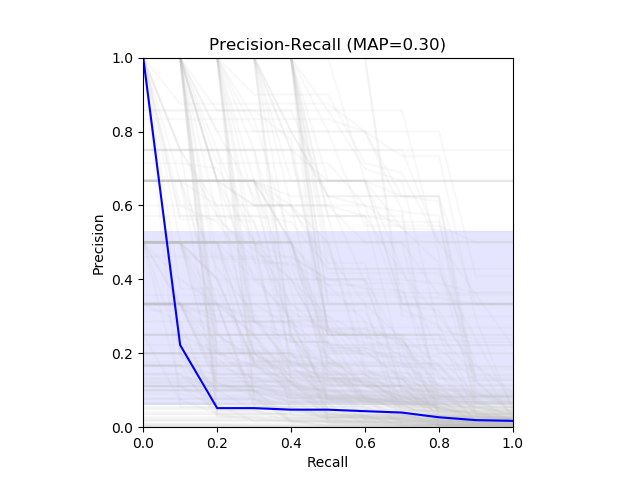

In [2]:
from IPython.display import Image
Image(filename='results/VSMResult.png') 

 **LMD Recall curve :**

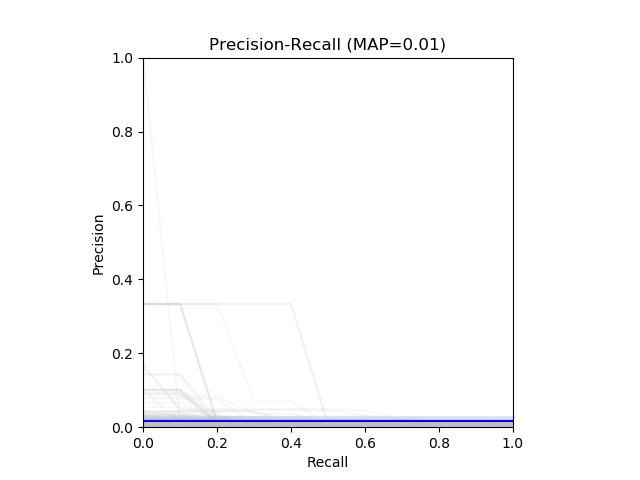

In [3]:
from IPython.display import Image
Image(filename='results/LMDResult.png') 

**LMJ Recall curve :**

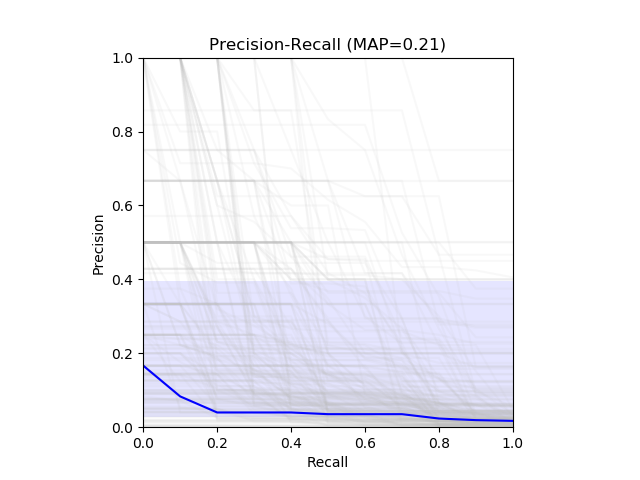

In [4]:
from IPython.display import Image
Image(filename='results/LMJMResult.png') 

**BM25 Recall curve :**

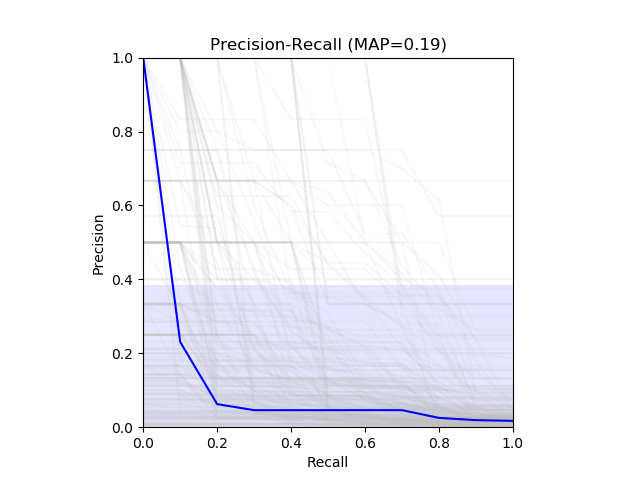

In [5]:
from IPython.display import Image
Image(filename='results/BM25Result.png') 

# 4. Experimental analysis and its results 

Our model matrix algorithms were designed to have the best time complexity, this means we opted by
not using any loops during the execution of the algorithms, its based only on matrix calculus.
As for the ranking models, we can observe some consistency around the LMD and LMJM models, and BM25 with VSM.
Since the BM25 and VSM are part of the same family (Probabilistic Retrieval Models) the results are quite similar, the same goes for the LMD and LMJM but for Language Models.
For the VSM its probably due to having a lot of long documents which results in a poorly representation, because they have poor similarity values. Documents with similar context but different term vocabulary will not be associated, resulting in a error of type 2 ->"false negative match".
For long queries, the Jelinek-Mercer smoothing performs better than the Dirichlet smoothing while for short queries, the Dirichlet smoothing performs better than the Jelinek-Mercer one.
As for the dataset, we should not have too much long documents to represent a better similarity and keep and eye on repetion of terms in the same documenst.
Running these tests took about 35/40 minutes in this notebook, while in the test class "Main Module" took about 10 minutes, if we opted by using loops instead of matrix calculus as we mentioned above the time
would polinomialy increase. The key for a good search engine is not just the precision and the relevance of the documents and queries, but also the time, no one wants to wait more than a few seconds to obtain a simple search
result.
